In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mt
import seaborn as sns
import squarify
%matplotlib inline

# Dataset 1

In [2]:
music_sales=pd.read_csv('Music Sales.csv')

In [3]:
music_sales.head()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99
2,For Those About To Rock We Salute You,AC/DC,8.60M,0.99,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263288,1,+47 22 44 22 22,171,1,Europe,NaN,Breaking The Rules,0.99
3,For Those About To Rock We Salute You,AC/DC,6.85M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,210834,1,+47 22 44 22 22,171,2,Europe,NaN,Inject The Venom,0.99
4,For Those About To Rock We Salute You,AC/DC,8.61M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263497,1,+47 22 44 22 22,171,2,Europe,NaN,Evil Walks,0.99


# Bar Chart
### Most Popular Genre 

In [4]:
a=music_sales.groupby("Genre")["Quantity"].sum().sort_values(ascending=False)

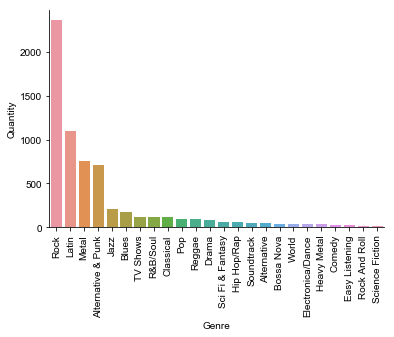

In [5]:
popular_genre=sns.barplot(x=a.index, y=a)
set_=popular_genre.set_xticklabels(popular_genre.get_xticklabels(), rotation=90) # rotate the text in x-axis
sns.despine()
sns.set_style("whitegrid", {'grid.linestyle': ' '})

# Treemap
### Sales Distribution by Region and Country 

In [6]:
music_sales["RSale"]=music_sales["Quantity"]*music_sales["UnitPrice"] # RSale

In [7]:
music_sales["RSale_p"]=music_sales["RSale"]/sum(music_sales["RSale"]) # percentage

In [8]:
b=music_sales.groupby(["Region","Country"])["RSale_p"].sum()

In [9]:
b

Region          Country       
Asia            India             0.031792
Europe          Austria           0.018675
                Belgium           0.015370
                Czech Republic    0.040656
                Denmark           0.017012
                Finland           0.020616
                France            0.084788
                Germany           0.063592
                Hungary           0.025415
                Ireland           0.018982
                Italy             0.016266
                Netherlands       0.020015
                Norway            0.015972
                Poland            0.018355
                Portugal          0.029702
                Spain             0.015520
                Sweden            0.016570
                United Kingdom    0.045514
North  America  Canada            0.128345
                USA               0.230248
Oceania         Australia         0.011043
South America   Argentina         0.016564
                Brazil 

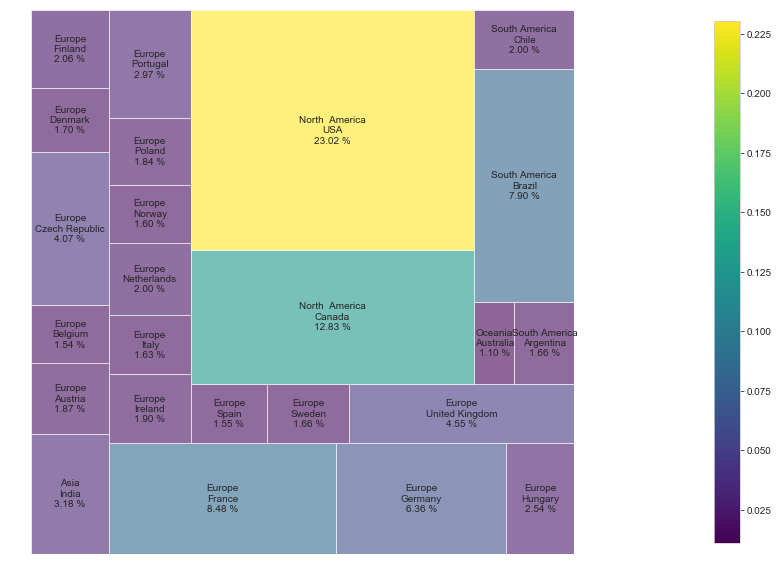

In [10]:
fig2, ax2 = plt.subplots(figsize=(50, 10))
#plt.rc('legend', fontsize=15) 
# set color for different value
cmap = plt.cm.viridis
mini, maxi = b.min(), b.max()
norm = mt.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in b]


label1=["%s\n%s\n%.2f" % (label) for label in zip(b.index.get_level_values('Region'),b.index.get_level_values('Country'),b*100) ] # set label
for i in range(0,len(label1)):
    label1[i]+=" %"
#label format
# region
# country
# percenge %
#print(label1)
s=squarify.plot(sizes=b.values, color=colors, label=label1, ax=ax2, alpha=.6, text_kwargs={'fontsize':10} )
plt.axis('off')
img1 = ax2.imshow([b.values],cmap=cmap)
fig2.colorbar(img1, ax=ax2, orientation="vertical",shrink=0.96)
img1.set_visible(False)
plt.show()

# lmplot
### Rock vs. Alternative and Punk vs. Heavy Metal

In [11]:
# select the data with genre is  "Rock", "Alternative & Punk", or "Heavy Metal"
genre_filter=((music_sales.Genre=="Rock") | (music_sales.Genre=="Alternative & Punk") | (music_sales.Genre=="Heavy Metal"))
music_sales_1=music_sales[genre_filter]

In [12]:
# count the total quantity of each genre in each month 
sales=music_sales_1.groupby([music_sales_1.Genre,pd.to_datetime(music_sales_1["InvoiceDate"]).dt.year,pd.to_datetime(music_sales_1["InvoiceDate"]).dt.month])["Sales"].sum()

In [13]:
# invoicedate (year and month) are multi-index, it's difficult to use in plot the graph
# combine year and month
# take the invoicedate year and month to new list (format:year-month)
date_list=list()
for i in range(0,len(sales)):
    temp=str()
    temp+=str(sales.index[i][1]) # year
    temp+='-' # -
    temp+=str(sales.index[i][2]) # month
    date_list.append(temp)

In [14]:
# create the genre list of each row
# genre is also part of multi-index
genre_list=list()
for i in range(0,len(sales)):
    genre_list.append(sales.index[i][0])

In [15]:
# create the df to plot the graph
sales=pd.DataFrame({
    "date":date_list,
    "genre":genre_list,
    "num":list(sales)
})

In [16]:
# create the list which is use to show in the x-axis, only show the year
x_axis=list()
for i in range(0,len(sales)):
    if len(x_axis)==0:
        x_axis.append(sales.date[i][0:4])
    else:
        if sales.date[i][0:4] not in x_axis:
            x_axis.append(sales.date[i][0:4])

In [17]:
# convert to float which is use to be x in lmplot()
x_axis_f=mt.dates.datestr2num(x_axis)

In [18]:
# convert sales.date (whole col) to float which is use to be x in lmplot()
# the data(x,y) use in lmplot can't be string
sales.date=mt.dates.datestr2num(sales.date)

C:\Users\minhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


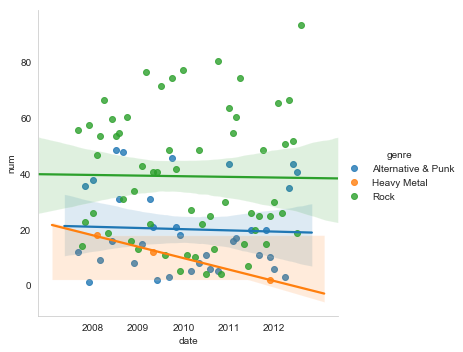

In [19]:
ax=sns.lmplot(x="date", y="num", hue="genre", data=sales)
sns.despine()
sns.set_style("whitegrid", {'grid.linestyle': ' '})
# now, the x-axis are all float number, need to convert to year(string)
for i in ax.axes.flat: 
    i.set_xticks(x_axis_f)
    i.set_xticklabels(x_axis)

# Line plot 
### Sales in US and Canada

In [20]:
# filter: US and Canada
music_sales_UC=music_sales[((music_sales.Country=="Canada") | (music_sales.Country=="USA"))]

In [21]:
music_sales_UC.head()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice,RSale,RSale_p
12,Audioslave,Audioslave,6.32M,0.99,Edmonton,Telus,Audioslave/Chris Cornell,Canada,14,mphilips12@shaw.ca,...,1,+1 (780) 434-4554,T6G 2C7,1,North America,AB,Set It Off,0.99,0.99,0.000149
13,Plays Metallica By Four Cellos,Apocalyptica,14.38M,1.98,Edmonton,Telus,Apocalyptica,Canada,14,mphilips12@shaw.ca,...,1,+1 (780) 434-4554,T6G 2C7,2,North America,AB,Master Of Puppets,0.99,1.98,0.000298
14,Warner 25 Anos,AntÃ´nio Carlos Jobim,5.57M,2.97,Edmonton,Telus,NaN,Canada,14,mphilips12@shaw.ca,...,1,+1 (780) 434-4554,T6G 2C7,3,North America,AB,Angela,0.99,2.97,0.000448
15,Plays Metallica By Four Cellos,Apocalyptica,11.41M,2.97,Edmonton,Telus,Apocalyptica,Canada,14,mphilips12@shaw.ca,...,1,+1 (780) 434-4554,T6G 2C7,3,North America,AB,Welcome Home (Sanitarium),0.99,2.97,0.000448
16,Facelift,Alice In Chains,7.85M,2.97,Edmonton,Telus,Jerry Cantrell,Canada,14,mphilips12@shaw.ca,...,1,+1 (780) 434-4554,T6G 2C7,3,North America,AB,Bleed The Freak,0.99,2.97,0.000448


C:\Users\minhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


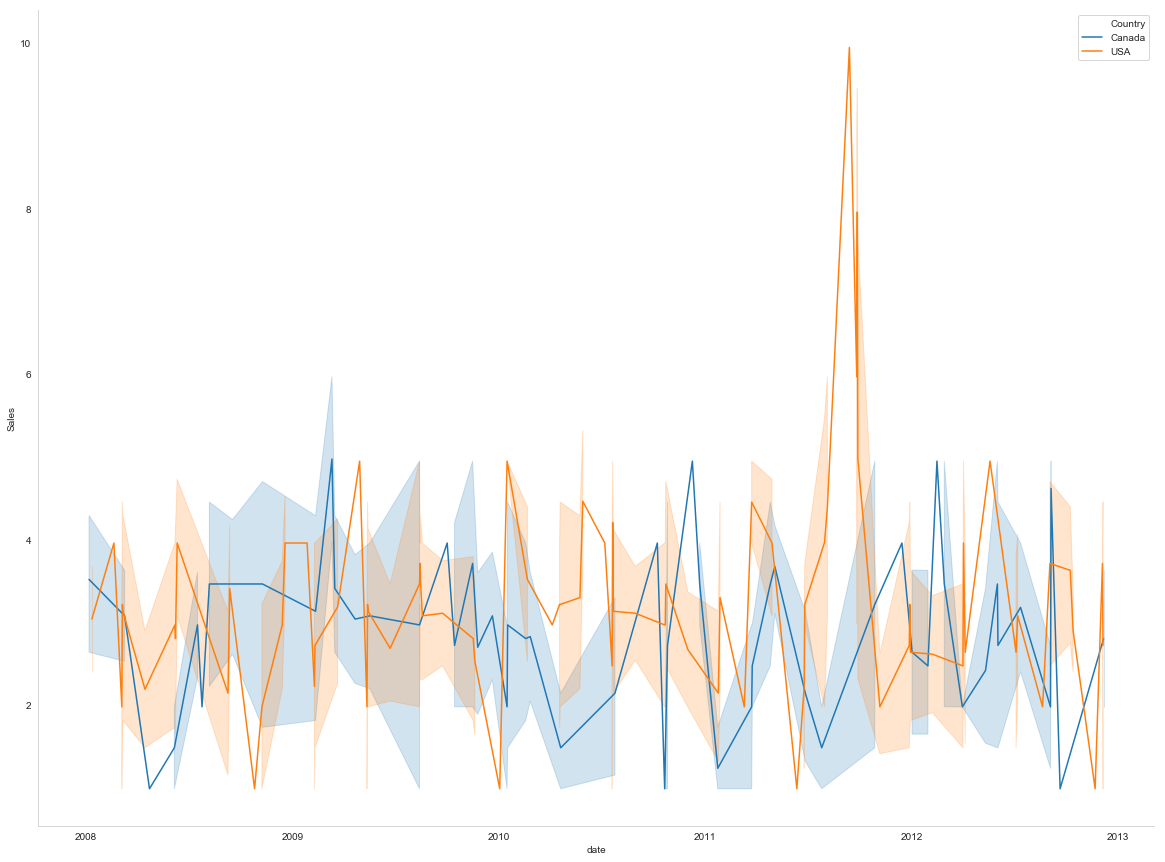

In [22]:
# the plot without calculating the the of sales of each day
music_sales_UC['date_f']=pd.to_datetime(music_sales_UC['InvoiceDate'])
fig, ax = plt.subplots(figsize=(20,15))
time_plot=sns.lineplot(x="date_f", y="Sales",
             hue="Country", 
             data=music_sales_UC)
plt.xlabel('date')
sns.despine()
sns.set_style("whitegrid", {'grid.linestyle': ' '})
#sns.set(font_scale = 3)
#ax.set(xticks=x_axis_f, xticklabels=x_axis)

# violinplot
### Sales in each country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

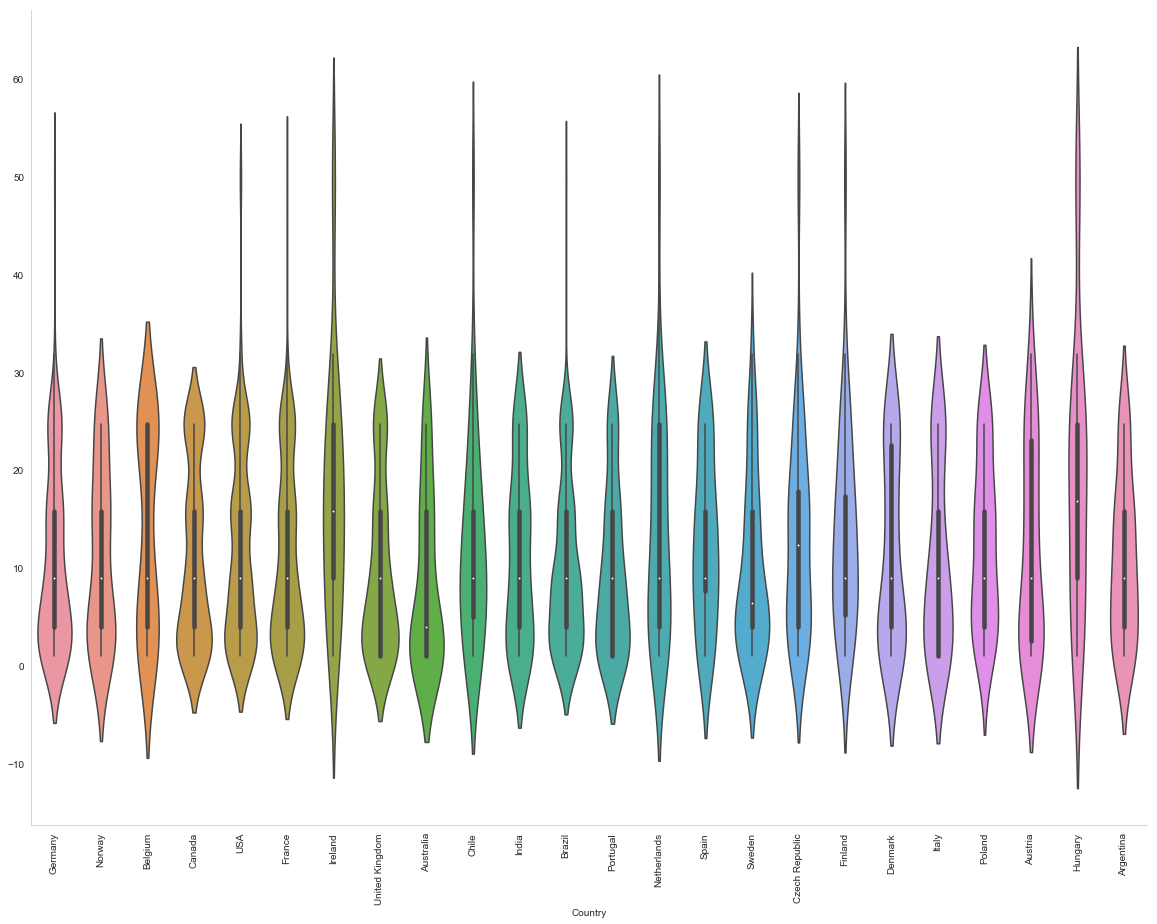

In [23]:
fig, ax = plt.subplots(figsize=(20,15))
sns.violinplot(x='Country', y=music_sales.Quantity*music_sales.Sales,data=music_sales)
#sns.set(font_scale = 3)
sns.despine()
sns.set_style("whitegrid", {'grid.linestyle': ' '})
plt.xticks(rotation=90)


# countplot
### count the mediatype in each Genre

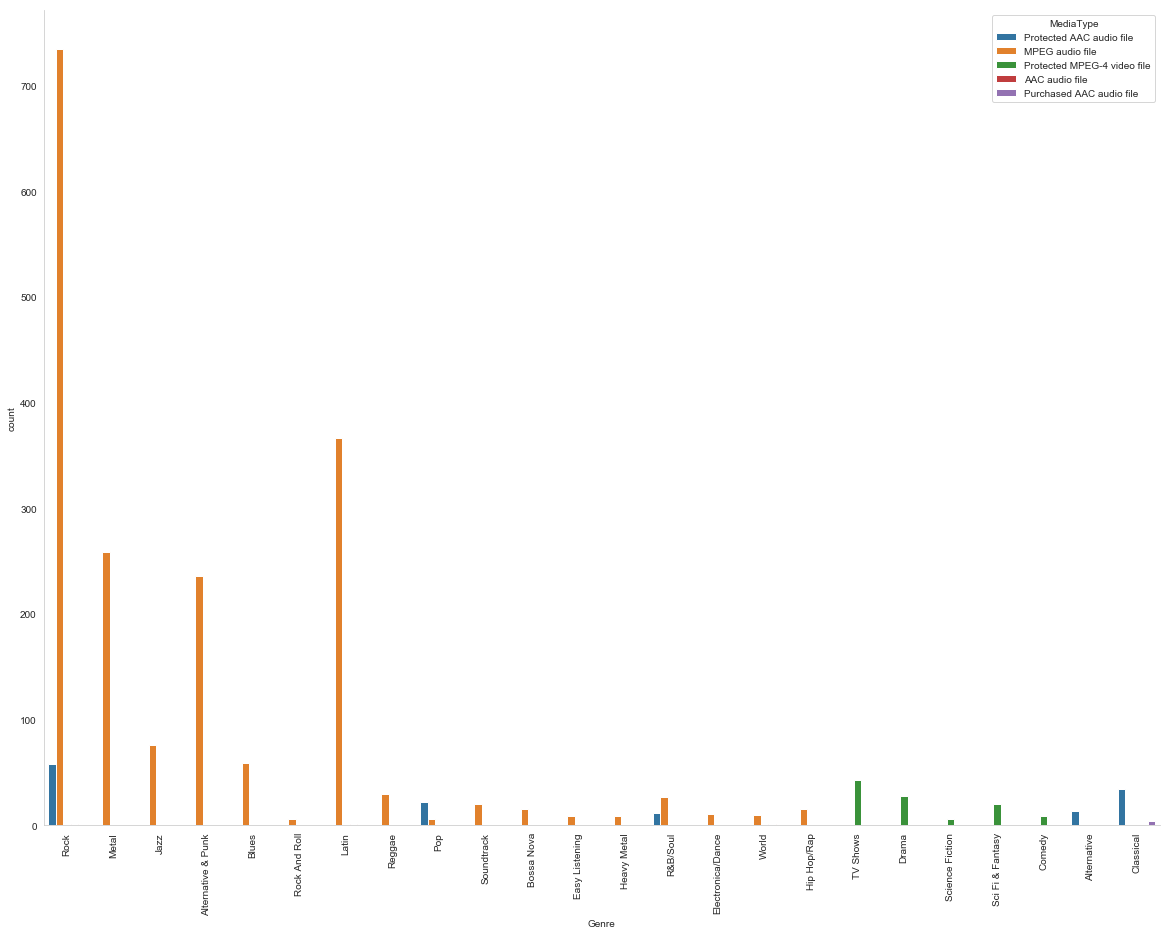

In [24]:
fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(x="Genre", hue="MediaType", data=music_sales)
#sns.set(font_scale = 3)
plt.xticks(rotation=90)
sns.despine()
sns.set_style("whitegrid", {'grid.linestyle': ' '})

# Dataset 2

In [25]:
x=np.random.uniform(low=1.0, high=100.0, size=(100,))

In [26]:
y=x+np.random.uniform(low=1.0, high=100.0, size=(100,))

In [27]:
z=y-np.random.uniform(low=1.0, high=100.0, size=(100,))

In [28]:
df=pd.DataFrame({'x':x,'y':y,'z':z})

# Scatter Plot
### x&y vs. x&z

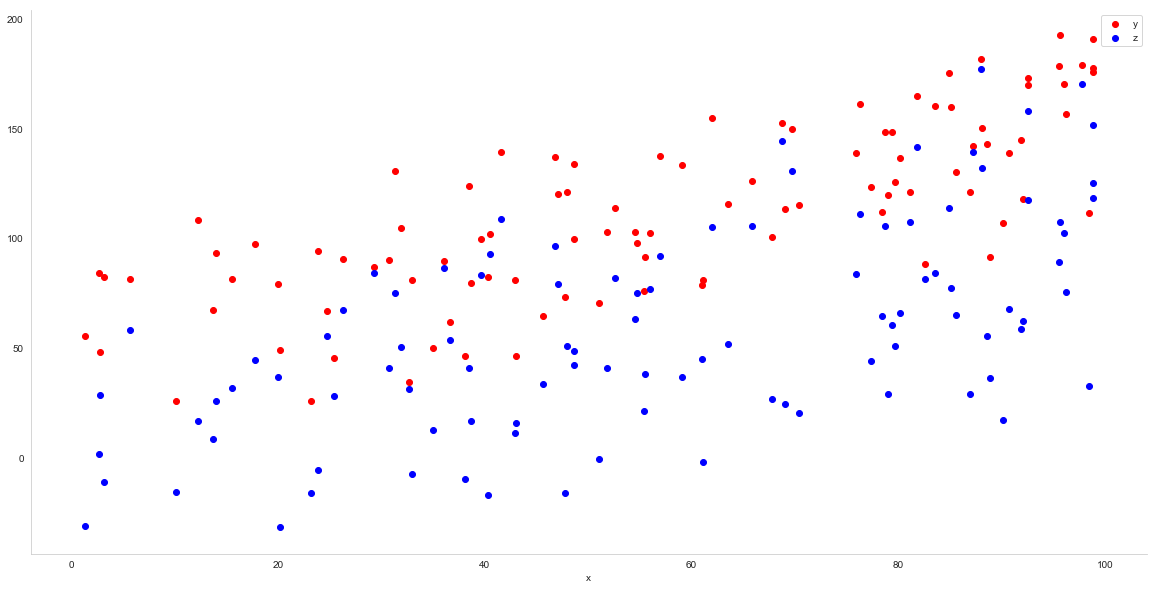

In [29]:
# x & y   vs.    x &z
plt.figure(figsize=(20,10))
plt.scatter(df.x,df.y,c='r')
plt.scatter(df.x,df.z,c='b')
plt.xlabel('x')
plt.legend()
sns.despine()
sns.set_style("whitegrid", {'grid.linestyle': ' '})
plt.show()

# boxplot
### boxplot for x,y,z

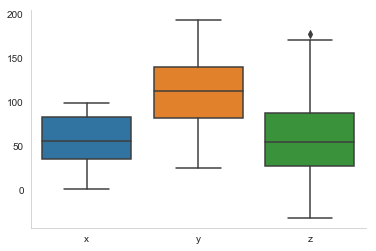

In [30]:
sns.boxplot(data=df)
sns.despine()
sns.set_style("whitegrid", {'grid.linestyle': ' '})

# Histogram
### distribution of x

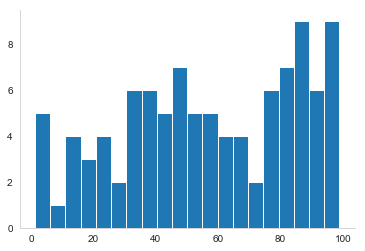

In [31]:
plt.hist(x=x,bins=20)
sns.despine()
sns.set_style("whitegrid", {'grid.linestyle': ' '})

# pairplot
### for x,y,z in df

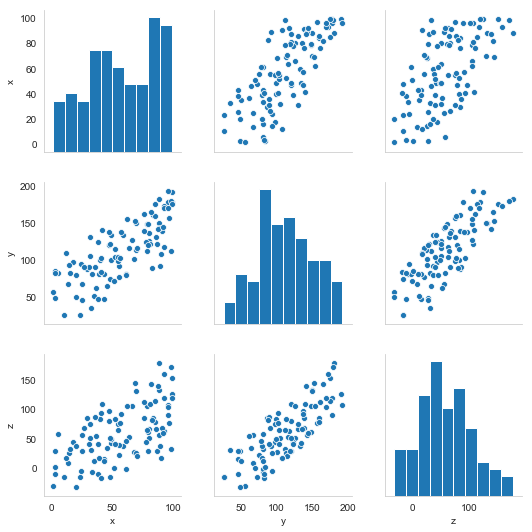

In [32]:
sns.pairplot(df)
#p.tick_params(labelsize=5)
sns.despine()
sns.set_style("whitegrid", {'grid.linestyle': ' '})
plt.tight_layout()

# Dataset3

In [33]:
i=np.random.randint(200, size=(10, 10))

# Heatmap

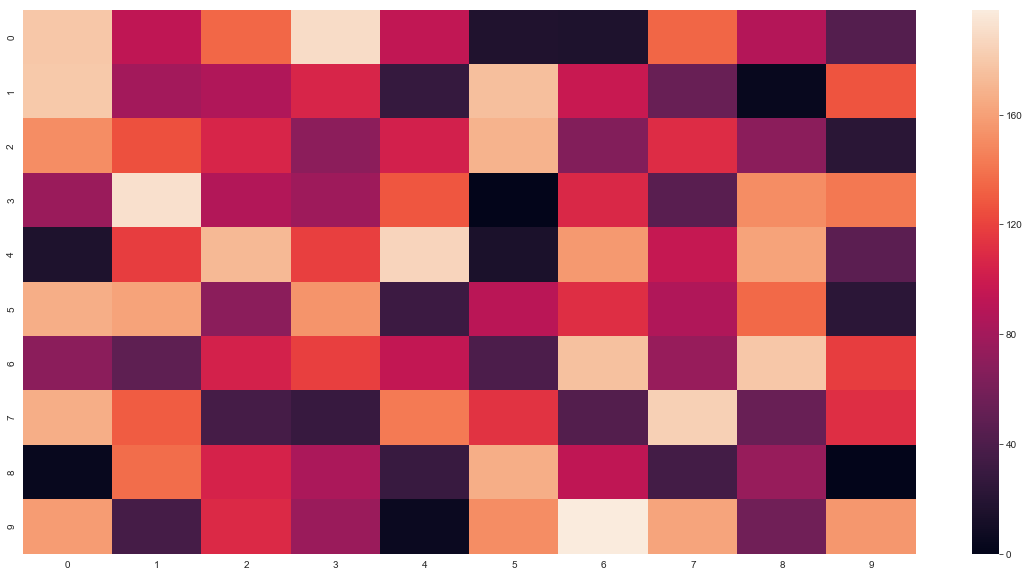

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(i)
plt.savefig('xyz.png', dpi=400) # save plot

In [35]:
# bar chart
# tree map
# lmplot
# line plot
# violinplot
# countplot
# scatter
# boxplot
# histogram
# pairplot
# heatmap